In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Warehouse_and_Retail_Sales.csv")

#check the number of rows and columns
rows, columns = df.shape

print("\nThere are", rows, "rows.")
print("There are", columns, "columns.")

df.head()


There are 307645 rows.
There are 9 columns.


,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [55]:
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307645.000000,307645.000000,307642.000000,307645.000000,307645.000000
mean,2018.438525,6.423862,7.024071,6.936465,25.294597
std,1.083061,3.461812,30.986238,30.237195,249.916798
min,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.267500,3.000000,5.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000


Based on the summary statistics of the...

In [56]:
print("Number of distinct entries for relevant columns: \n")
print(" - There are", df['SUPPLIER'].nunique(), "different suppliers.")
print(" - There are", df['ITEM DESCRIPTION'].nunique(), "different items.")
print(" - There are", df['ITEM TYPE'].nunique(), "different item types.")

Number of distinct entries for relevant columns: 

 - There are 396 different suppliers.
 - There are 34822 different items.
 - There are 8 different item types.


In [57]:

#reformat column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#combine year and month columns
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2) + '-01')

#remove duplicate values
df.drop_duplicates(inplace=True)

df = df[['date','year','month','supplier','item_code','item_description','item_type','retail_sales','retail_transfers','warehouse_sales']]

df.head()

,date,year,month,supplier,item_code,item_description,item_type,retail_sales,retail_transfers,warehouse_sales
0,2020-01-01,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020-01-01,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020-01-01,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020-01-01,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020-01-01,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [58]:
#check the number of NULL values
df.isnull().sum()

#very small number of NULL values so I will just remove the rows with NULL values

df.dropna(subset=['supplier', 'item_type', 'retail_sales'], inplace=True)

In [59]:
#find top suppliers

suppliers_retail_sales = df.groupby('supplier')['retail_sales'].sum().sort_values(ascending=False)

print("\nRetail sales by supplier",suppliers_retail_sales.head())


item_type_retail_sales = df.groupby('item_type')['retail_sales'].sum().sort_values(ascending=False)

print("\nRetail sales by item type\n",item_type_retail_sales.head())




Retail sales by supplier supplier
E & J GALLO WINERY          166170.53
DIAGEO NORTH AMERICA INC    145343.20
CONSTELLATION BRANDS        131664.79
ANHEUSER BUSCH INC          109960.82
JIM BEAM BRANDS CO           96164.04
Name: retail_sales, dtype: float64

Retail sales by item type
 item_type
LIQUOR          802691.43
WINE            746498.59
BEER            574220.53
NON-ALCOHOL      27150.31
STR_SUPPLIES      2234.90
Name: retail_sales, dtype: float64


In [60]:
suppliers_warehouse_sales = df.groupby('supplier')['warehouse_sales'].sum().sort_values(ascending=False)

print("\nWarehouse sales by supplier\n",suppliers_warehouse_sales.head())


item_type_warehouse_sales = df.groupby('item_type')['warehouse_sales'].sum().sort_values(ascending=False)

print("\nWarehouse sales by item type\n",item_type_warehouse_sales.head())


Warehouse sales by supplier
 supplier
CROWN IMPORTS             1651871.51
MILLER BREWING COMPANY    1425428.71
ANHEUSER BUSCH INC        1331170.84
HEINEKEN USA               829796.46
E & J GALLO WINERY         197463.78
Name: warehouse_sales, dtype: float64

Warehouse sales by item type
 item_type
BEER           6527236.51
WINE           1156984.91
KEGS            118431.00
LIQUOR           94906.27
NON-ALCOHOL      26149.59
Name: warehouse_sales, dtype: float64


In [61]:
item_description__retail_sales = df.groupby('item_description')['retail_sales'].sum().sort_values(ascending=False)

print("\nRetail sales by product name",item_description__retail_sales.head())

item_description_warehouse_sales = df.groupby('item_description')['warehouse_sales'].sum().sort_values(ascending=False)

print("\nWarehouse sales by product name",item_description_warehouse_sales.head())


Retail sales by product name item_description
TITO'S HANDMADE VODKA - 1.75L    27580.5
CORONA EXTRA LOOSE NR - 12OZ     25064.0
HEINEKEN LOOSE NR - 12OZ         17761.0
MILLER LITE 30PK CAN - 12OZ      14440.0
BUD LIGHT 30PK CAN               12299.0
Name: retail_sales, dtype: float64

Warehouse sales by product name item_description
CORONA EXTRA LOOSE NR - 12OZ    303160.83
CORONA EXTRA 2/12 NR - 12OZ     247924.43
HEINEKEN LOOSE NR - 12OZ        171950.21
HEINEKEN 2/12 NR - 12OZ         154654.49
MILLER LITE 30PK CAN - 12OZ     134486.40
Name: warehouse_sales, dtype: float64


Text(0.5, 0, 'Cases Sold')

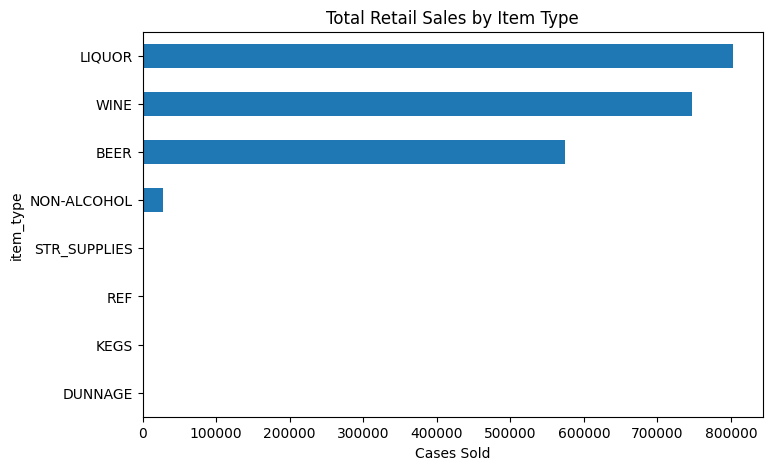

In [62]:
df.groupby('item_type')['retail_sales'].sum().sort_values().plot(kind='barh', figsize=(8, 5))
plt.title("Total Retail Sales by Item Type")
plt.xlabel("Cases Sold")

(array([17287., 17410., 17532., 17652., 17775., 17897., 18017., 18140.,
        18262., 18383., 18506.]),
 [Text(17287.0, 0, '2017-05'),
  Text(17410.0, 0, '2017-09'),
  Text(17532.0, 0, '2018-01'),
  Text(17652.0, 0, '2018-05'),
  Text(17775.0, 0, '2018-09'),
  Text(17897.0, 0, '2019-01'),
  Text(18017.0, 0, '2019-05'),
  Text(18140.0, 0, '2019-09'),
  Text(18262.0, 0, '2020-01'),
  Text(18383.0, 0, '2020-05'),
  Text(18506.0, 0, '2020-09')])

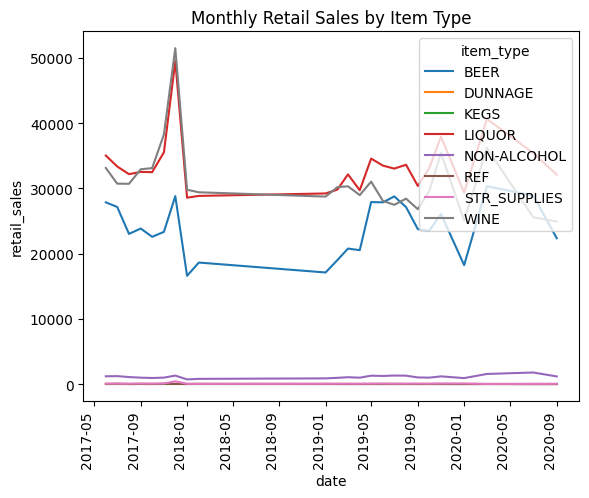

In [68]:
monthly = df.groupby(['date', 'item_type'])['retail_sales'].sum().reset_index()

sns.lineplot(data=monthly, x='date', y='retail_sales', hue='item_type')
plt.title("Monthly Retail Sales by Item Type")
plt.xticks(rotation=90, ha='right')

Text(0.5, 1.0, 'Retail Sales by Top Suppliers and Item Type')

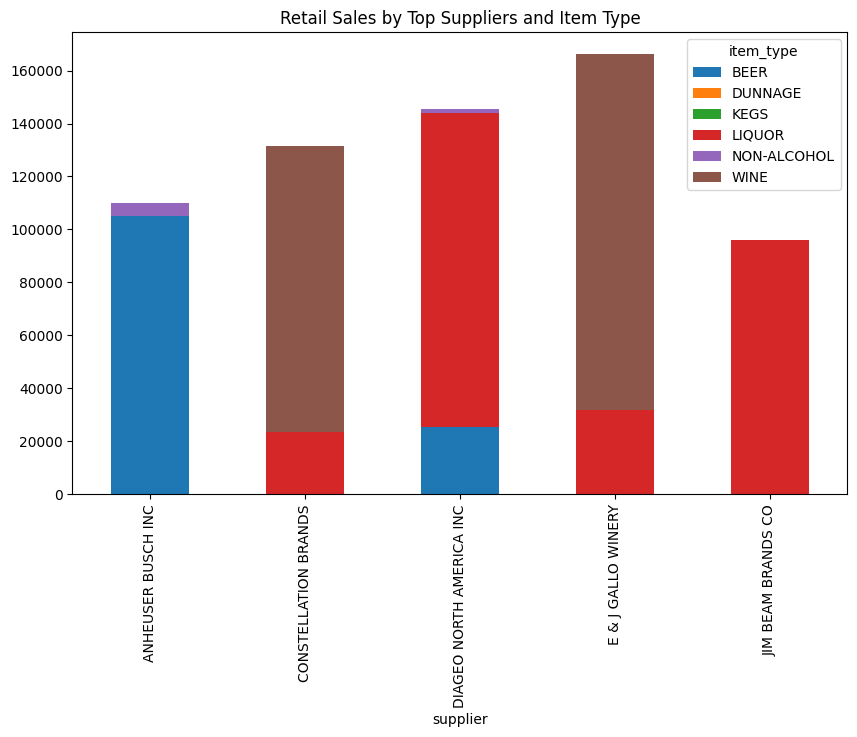

In [67]:
top_suppliers = df.groupby('supplier')['retail_sales'].sum().nlargest(5).index
filtered_df = df[df['supplier'].isin(top_suppliers)]

pivot = filtered_df.groupby(['supplier', 'item_type'])['retail_sales'].sum().unstack(fill_value=0)
pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Retail Sales by Top Suppliers and Item Type")